In [1]:
from elecmarket import *
import os as os
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns

np.random.seed(42)

In [2]:
scenario_name = "carbon_tax"

cp = getpar("common_params.py")
cagents = [Conventional('Coal', cp, getpar('coal.py')),
          Conventional('Gas', cp, getpar('gas.py'))]

ragents = [Renewable('Wind', cp, getpar('renewable.py'))]

Niter = cp['iterations']
tol = cp['tolerance']

sim = Simulation(cagents,ragents,cp)

start_simu = time.time()

###################### Version MFG ######################

conv, elapsed, Nit, mfg_prices, mfg_revenues = sim.run(Niter, tol, cp['power'], cp['offset'])

print("MFG Revenues: ", mfg_revenues)
print('Elapsed time: ', elapsed/60)


Iteration 0
Weight: 0.2759; Wind: 2048607.00; Coal: 2610481.97; Gas: 4635587.46; Total: 9294676.43
Iteration 1
Weight: 0.2385; Wind: 343166.33; Coal: 250303.11; Gas: 681403.62; Total: 1274873.06
Iteration 2
Weight: 0.2108; Wind: 126911.74; Coal: 8060.32; Gas: 114157.46; Total: 249129.52
Iteration 3
Weight: 0.1895; Wind: 88383.39; Coal: 9478.53; Gas: 45715.43; Total: 143577.35
Iteration 4
Weight: 0.1724; Wind: 67270.24; Coal: 8123.02; Gas: 20491.27; Total: 95884.53
Iteration 5
Weight: 0.1585; Wind: 54347.20; Coal: 6763.55; Gas: 11365.12; Total: 72475.88
Iteration 6
Weight: 0.1469; Wind: 45312.33; Coal: 5681.93; Gas: 7713.51; Total: 58707.78
Iteration 7
Weight: 0.1370; Wind: 38517.35; Coal: 4834.80; Gas: 5858.73; Total: 49210.89
Iteration 8
Weight: 0.1285; Wind: 33183.96; Coal: 4161.90; Gas: 4839.28; Total: 42185.14
Iteration 9
Weight: 0.1211; Wind: 28893.96; Coal: 3618.02; Gas: 4165.07; Total: 36677.06
Iteration 10
Weight: 0.1146; Wind: 25384.04; Coal: 3168.00; Gas: 3647.76; Total: 3219

In [3]:
out = sim.write(scenario_name)

try:
    os.mkdir(scenario_name)
except FileExistsError:
    print('Directory already exists')
    
os.system(f"copy common_params.py {scenario_name}\\common_params.py")

# parameter files are copied to output directory; change this if you change agent types
os.system(f"copy common_params.py {scenario_name}\\coal.py")
os.system(f"copy common_params.py {scenario_name}\\gas.py")
os.system(f"copy common_params.py {scenario_name}\\renewable.py")

os.system(f"copy common_params.py {scenario_name}\\"+scenario_name+".csv")



0

In [9]:
# Years for tick marks
years = list(range(2021, 2021 + cp['tmax']))  # Years from 2024 to 2040

# Creating a DataFrame for easy plotting with seaborn
df = pd.DataFrame({
    'Year': out['time'],
    'Peak Price': out['peak price'],
    'Offpeak Price': out['offpeak price'],
    'Coal Capacity': out['Coal capacity'], #Conv GW
    'Gas Capacity': out['Gas capacity'], #Conv GW
    'Wind Capacity': out['Wind capacity'], #Conv GW
    'Coal Price': out['Fuel 0'],
    'Gas Price': out['Fuel 1'],
    'Peak Demand': sim.pdemand, #Conv GW
    'Offpeak Demand': sim.opdemand, #Conv GW
    'Coal Offpeak Supply': out['Coal offpeak supply'], #Conv GWh
    'Gas Offpeak Supply': out['Gas offpeak supply'], #Conv GW
    'Wind Offpeak Supply': out['Wind offpeak supply'], #Conv GW
    'Coal Peak Supply': out['Coal peak supply'], #Conv GW
    'Gas Peak Supply': out['Gas peak supply'], #Conv GW
    'Wind Peak Supply': out['Wind peak supply'], #Conv GW
    'Baseload Peak Supply': out['Baseload peak supply'],
    'Baseload Offpeak Supply': out['Baseload offpeak supply'],
    'Default Peak': out['Default peak'],
    'Default Offpeak': out['Default offpeak'],
})

df['Year'] = df['Year'].map(lambda x: 2021 + x)

print(df)

            Year  Peak Price  Offpeak Price  Coal Capacity  Gas Capacity  \
0    2021.000000   78.913705      78.544121      46.000482     30.999875   
1    2021.083612   73.537545      72.078730      18.049656     37.482561   
2    2021.167224   78.696661      75.698680      16.577212     38.378138   
3    2021.250836   83.092640      79.085094      15.353801     39.201000   
4    2021.334448   82.816041      78.138096      14.305401     39.960268   
..           ...         ...            ...            ...           ...   
295  2045.665552  173.992208     161.704063       0.000000     71.014546   
296  2045.749164  154.615106     148.670421       0.000000     71.002662   
297  2045.832776  176.955711     162.340139       0.000000     70.990786   
298  2045.916388  163.412218     154.574276       0.000000     70.978916   
299  2046.000000  158.315210     152.313003       0.000000     70.967053   

     Wind Capacity  Coal Price  Gas Price  Peak Demand  Offpeak Demand  \
0        52.9

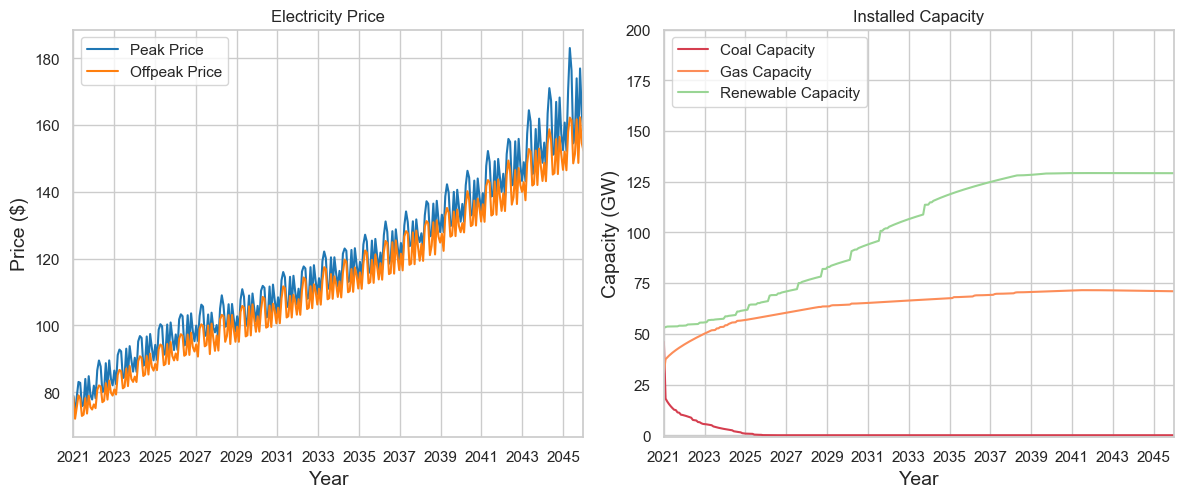

In [10]:

# Setting the style and context for seaborn
sns.set(style="whitegrid")

# Define the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the electricity prices with seaborn
sns.lineplot(ax=axes[0], x='Year', y='Peak Price', data=df, label='Peak Price', color='tab:blue')
sns.lineplot(ax=axes[0], x='Year', y='Offpeak Price', data=df, label='Offpeak Price', color='tab:orange')

axes[0].set_ylabel('Price ($)', fontsize=14)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_xlim(2021, 2021+cp['tmax'])
axes[0].legend()

# Set x-axis ticks to display every other year for less clutter
tick_indices = range(2021, 2021+cp['tmax'], 2)  # This skips every other year
axes[0].set_xticks(tick_indices)

# Plotting the capacity for each agent type with seaborn
sns.lineplot(ax=axes[1], x='Year', y='Coal Capacity', data=df, label='Coal Capacity', color='#d53e4f')
sns.lineplot(ax=axes[1], x='Year', y='Gas Capacity', data=df, label='Gas Capacity', color='#fc8d59')
sns.lineplot(ax=axes[1], x='Year', y='Wind Capacity', data=df, label='Renewable Capacity', color='#99d594')
axes[1].set_ylabel('Capacity (GW)', fontsize=14)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylim(-1, 200)
axes[1].set_xlim(2021, 2021+cp['tmax'])
axes[1].legend(loc='upper left')

# Apply the same x-axis settings to the second subplot
axes[1].set_xticks(tick_indices)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/" + 'price_capacity.pdf', format='pdf')
axes[0].set_title('Electricity Price')
axes[1].set_title('Installed Capacity')
# Show the plot (optional, can be removed if only saving is needed)
plt.show()


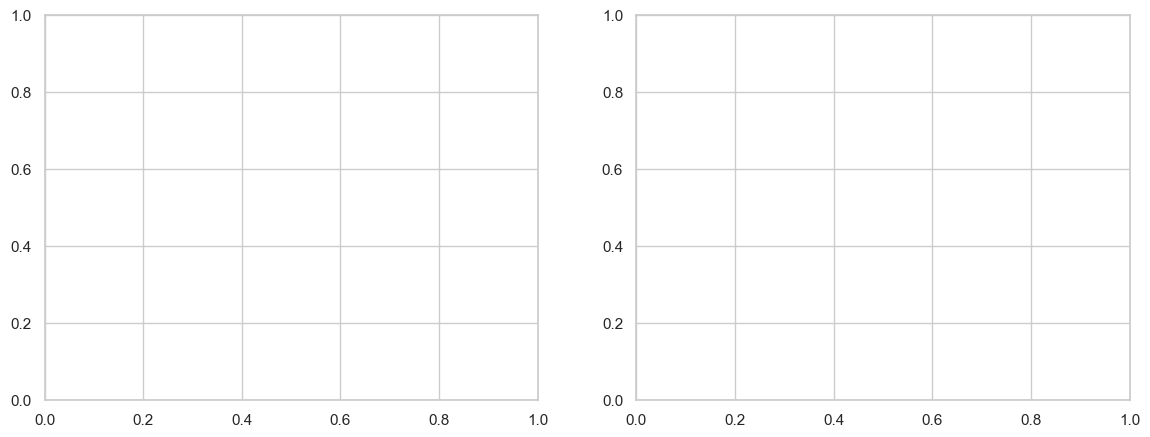

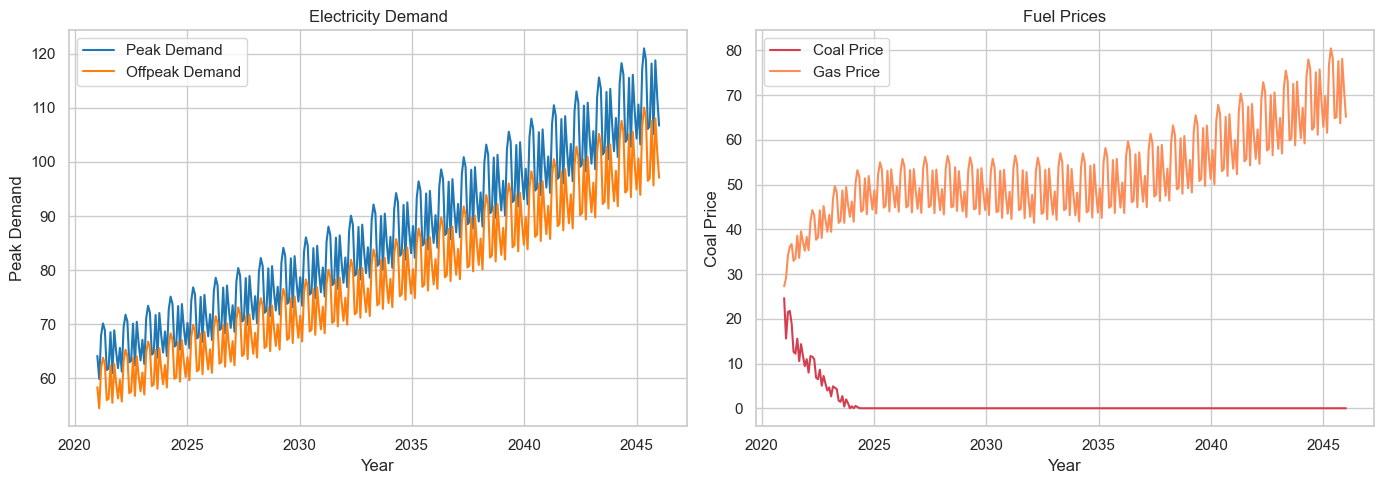

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plotting demand
sns.lineplot(ax=axes[0], x='Year', y='Peak Demand', data=df, label='Peak Demand', color='tab:blue')
sns.lineplot(ax=axes[0], x='Year', y='Offpeak Demand', data=df, label='Offpeak Demand', color='tab:orange')
axes[0].set_title('Electricity Demand')
axes[0].legend()

# Plotting fuel prices
sns.lineplot(ax=axes[1], x='Year', y='Coal Price', data=df, label='Coal Price', color='#d53e4f')
sns.lineplot(ax=axes[1], x='Year', y='Gas Price', data=df, label='Gas Price', color='#fc8d59')
axes[1].set_title('Fuel Prices')
axes[1].legend()

plt.tight_layout()
plt.savefig(scenario_name + "/demand_fuelprice.pdf", format='pdf')
plt.show()


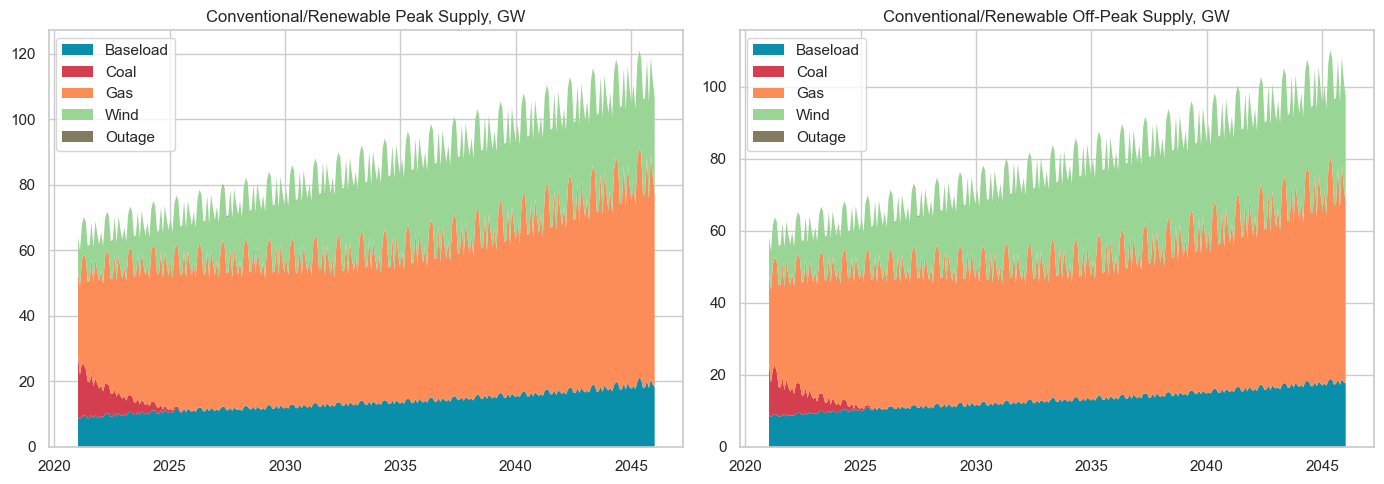

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plotting peak supply with stackplot
axes[0].stackplot(df['Year'], df['Baseload Peak Supply'], df['Coal Peak Supply'], df['Gas Peak Supply'], df['Wind Peak Supply'], df['Default Peak'],
                  labels=['Baseload', 'Coal', 'Gas', 'Wind', 'Outage'],
                  colors=['#0a8fab','#d53e4f', '#fc8d59', '#99d594', '#827b62'], linewidth=0)
axes[0].set_title('Conventional/Renewable Peak Supply, GW')
axes[0].legend(loc='upper left')

# Plotting off-peak supply with stackplot
axes[1].stackplot(df['Year'], df['Baseload Offpeak Supply'], df['Coal Offpeak Supply'], df['Gas Offpeak Supply'], df['Wind Offpeak Supply'], df['Default Offpeak'],
                  labels=['Baseload', 'Coal', 'Gas', 'Wind', 'Outage'],
                  colors=['#0a8fab','#d53e4f', '#fc8d59', '#99d594', '#827b62'], linewidth=0)
axes[1].set_title('Conventional/Renewable Off-Peak Supply, GW')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.savefig(scenario_name + "/supply.pdf", format='pdf')
plt.show()

In [13]:
# print("############### Planner Version ###############")
#
# initial_prices = np.random.rand(2 * sim.Nt + sim.Nfuels * sim.Nt)*10
#
# planner_objective, sim.Prp, sim.Prop, sim.fPrice = sim.optimizePrices(mfg_prices)
#
# end_simu = time.time()
#
# print("Time: ", end_simu-start_simu, "s")
#
# out = sim.write(scenario_name)
#
# try:
#     os.mkdir(scenario_name)
# except FileExistsError:
#     print('Directory already exists')
# os.system("cp common_params.py "+scenario_name+"/common_params.py")
#
# # parameter files are copied to output directory; change this if you change agent types
# os.system("cp coal.py "+scenario_name+"/coal.py")
# os.system("cp gas.py "+scenario_name+"/gas.py")
# os.system("cp renewable.py "+scenario_name+"/renewable.py")
#
# os.system("cp "+scenario_name+'.csv '+scenario_name+"/"+scenario_name+".csv")
#
#
# plt.figure(figsize=(14,5))
# plt.subplot(121)
# plt.plot(2025+out['time'], out['peak price'], label='peak price')
# plt.plot(2025+out['time'], out['offpeak price'], label='offpeak price')
# plt.legend()
# plt.title('Electricity price (Planner)')
# plt.subplot(122)
#
# # Plotting the capacity for each agent type; modify this if you change agent types
# plt.plot(2025+out['time'], out['Coal capacity'], label='Coal capacity')
# plt.plot(2025+out['time'], out['Gas capacity'],label='Gas capacity')
# plt.plot(2025+out['time'], out['Renewable capacity'], label='Renewable capacity')
# plt.legend()
# plt.title('Installed capacity (Planner)')
# plt.savefig(scenario_name+"/"+'price_capacity.pdf', format='pdf')
#
# plt.figure(figsize=(14, 5))
# plt.subplot(121)
# plt.plot(2025+out['time'], sim.pdemand, label='peak demand')
# plt.plot(2025+out['time'], sim.opdemand, label='offpeak demand')
# plt.legend()
# plt.title('Electricity demand (Planner)')
# plt.subplot(122)
#
# # Plotting the fuel prices; modify this if you change fuel types
# plt.plot(2025+out['time'], out['Fuel 0'], label='Coal price')
# plt.plot(2025+out['time'], out['Fuel 1'], label='Gas price')
# plt.legend()
# plt.title('Fuel price (Planner)')
# #plt.plot(2025+out['time'],np.interp(out['time'],cp["carbon tax"][0],cp["carbon tax"][1]))
# plt.savefig(scenario_name+"/"+'demand_fuelprice.pdf',format='pdf')
#
#
# plt.figure(figsize=(14,5))
# plt.subplot(121)
#
# # Plotting the supply for each agent; modify this if you change agent types
# plt.bar(2025+out['time'],out['Coal peak supply'],width=0.25,label='Coal supply')
# plt.bar(2025+out['time'],out['Gas peak supply'],width=0.25,
#         bottom=out['Coal peak supply'],label='Gas supply')
# plt.bar(2025+out['time'],out['Renewable peak supply'],width=0.25,
#         bottom=out['Gas peak supply']+out['Coal peak supply'],label='Renewable supply')
# #plt.ylim([0,80])
# plt.title('Conventional/ renewable peak supply, GW (Planner)')
# plt.legend()
# plt.subplot(122)
# plt.bar(2025+out['time'],out['Coal offpeak supply'],width=0.5,label='Coal supply')
# plt.bar(2025+out['time'],out['Gas offpeak supply'],width=0.25,
#         bottom=out['Coal offpeak supply'],label='Gas supply')
# plt.bar(2025+out['time'],out['Renewable offpeak supply'],width=0.25,
#         bottom=out['Gas offpeak supply']+out['Coal offpeak supply'],label='Renewable supply')
#
# plt.title('Conventional/ renewable off-peak supply, GW (Planner)')
#
# #plt.ylim([0,80])
#
# plt.legend()
# plt.savefig(scenario_name+"/"+'supply.pdf',format='pdf')
# plt.show()
#
#
